# EDA of the Instacart dataset

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [Conclusions](#data_preprocessing_conclusions)
* [Stage 3. Data analysis](#da)
    * [Conclusions](#da_conclusions)



## Introduction <a id='intro'></a>
In this project we are working with data from Instacart - a grocery delivery platform where customers can place a grocery order and have it delivered to them. Our mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers. 
 
The project will consist of three stages:
 1. Data overview - importing and looking through 5 provided csv files with data
 2. Data preprocessing - dealing with duplicates and missing values
 3. Data analysis - answering given questions
 
[Back to Contents](#back)

## Stage 1. Data overview <a id='data_review'></a>
Importing all the necessary libraries and reading the dataset from a csv file using pandas.
Obtaining the information about the table using different ways to check for missing values, duplicates and the correctness of column namings. 


In [50]:
import pandas as pd
from matplotlib import pyplot as plt

In [51]:
products = pd.read_csv("datasets/products.csv", sep=";")
products.head(15)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [52]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [53]:
len(products['product_id'].unique())

49694

In [54]:
order_p = pd.read_csv('datasets/order_products.csv', sep=';')
order_p.head(15)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


In [55]:
order_p.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [56]:
order_p['add_to_cart_order'].unique()

array([17.,  1., 35.,  5.,  4., 10., 14.,  2., 28.,  3., 16.,  8.,  7.,
        6.,  9., 15., 22., 49., 19., 13., 11., 12., 18., 24., 23., 45.,
       30., 31., 29., 21., 38., 20., 57., 58., 26., 25., 39., 34., 40.,
       27., nan, 43., 33., 42., 50., 32., 36., 37., 61., 46., 56., 41.,
       44., 55., 54., 47., 63., 48., 60., 62., 53., 59., 52., 51., 64.])

In [57]:
orders = pd.read_csv('datasets/instacart_orders.csv', sep=';')
orders.head(15)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [58]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [59]:
orders['days_since_prior_order'].unique()

array([30.,  9.,  2., 10., 17., 15., 22.,  4.,  8.,  3., 12., 11.,  7.,
        1.,  5.,  6., 14., nan, 20., 16., 24., 23., 27., 13.,  0., 28.,
       21., 25., 19., 18., 29., 26.])

In [60]:
aisle = pd.read_csv('datasets/aisles.csv', sep=';')
aisle.head(15)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [61]:
aisle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [62]:
dep = pd.read_csv('datasets/departments.csv', sep=';')
dep.head(15)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [63]:
dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


## Conclusions <a id='data_review_conclusions'></a>
There are five tables in the dataset.  Below is a data dictionary that lists the columns in each table and describes that data that hold.

**instacart_orders.csv:** each row corresponds to one order on the Instacart app - *478967 rows, contains missing values*
- 'order_id': ID number that uniquely identifies each order.
- 'user_id': ID number that uniquely identifies each customer account
- 'order_number': the number of times this customer has placed an order
- 'order_dow': day of the week that the order placed (which day is 0 is uncertain)
- 'order_hour_of_day': hour of the day that the order was placed
- 'days_since_prior_order': number of days since this customer placed their previous order - *contains missing values, datatype could be changed to integer*

**products.csv:** each row corresponds to a unique product that customers can buy - 49694 rows, *contains missing values*
- 'product_id': ID number that uniquely identifies each product
- 'product_name': name of the product - *contains missing values*
- 'aisle_id': ID number that uniquely identifies each grocery aisle category
- 'department_id': ID number that uniquely identifies each grocery department category

**order_products.csv:** each row corresponds to one item placed in an order - *4545007 rows, contains missing values*
- 'order_id': ID number that uniquely identifies each order
- 'product_id': ID number that uniquely identifies each product
- 'add_to_cart_order': the sequential order in which each item was placed in the cart - *contains missing values, datatype could be changed to integer*
- 'reordered': 0 if the customer has never ordered this product before, 1 if they have

**aisles.csv** - *134 rows, clean data*
- 'aisle_id': ID number that uniquely identifies each grocery aisle category
- 'aisle': name of the aisle

**departments.csv** - *21 rows, clean data*
- 'department_id': ID number that uniquely identifies each grocery department category
- 'department': name of the department


To move forward, we need to preprocess the data.

[Back to Contents](#back)

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>
Dealing with the missing and duplicated values. 

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [64]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [65]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [66]:
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [67]:
orders[orders['order_id'] ==794638]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0


In [68]:
# Check for all orders placed Wednesday at 2:00 AM
import calendar
calendar.day_name[0]

'Monday'

In [69]:
calendar.day_name[2]

'Wednesday'

In [70]:
orders[(orders['order_dow'] == 2) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


In [71]:
orders[(orders["order_dow"] == 3) & (orders["order_hour_of_day"] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [72]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [73]:
# Double check for duplicate rows
orders.duplicated().sum()

0

In [74]:
orders[(orders["order_dow"] == 3) & (orders["order_hour_of_day"] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [75]:
# Double check for duplicate order IDs only
orders.duplicated(subset='order_id').sum()

0

In [76]:
orders.duplicated(subset=['order_id','user_id']).sum()

0

**Summary:**
All of the duplicates occured on the 4th day of the week (assuming that "0" stands for the first day of the week), on 2 am. But not all of the entries from this day and hour are duplicated.
It is advisable to check who is responsible for entering that data in order to avoid similar errors in the future.

### `products` data frame

In [77]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [78]:
# Check for just duplicate product IDs
products.duplicated(subset='product_id').sum()

0

In [79]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name']=products['product_name'].str.lower()
products.duplicated(subset='product_name').sum()

1361

In [80]:
# Check for duplicate product names that aren't missing
products[(products.duplicated(subset='product_name'))&(~products['product_name'].isna())]

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [81]:
products[products['product_name']=='biotin 1000 mcg']

,product_id,product_name,aisle_id,department_id
41,42,biotin 1000 mcg,47,11
2058,2059,biotin 1000 mcg,47,11


**Summary:**
We found duplicated values in the 'product_name' column, but we can't drop those duplicates as they may be associated with other tables by different product id's.
Out of 1,361 duplicates, only 104 are actual duplicates, while the rest are due to missing values.  



### `departments` data frame

In [82]:
dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [83]:
# Check for fully duplicate rows
dep.duplicated().sum()

0

In [84]:
dep['department'].duplicated().sum()

0

**Summary:** clean data, only unique values.

### `aisles` data frame

In [85]:
aisle

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [86]:
# Check for fully duplicate rows
aisle.duplicated().sum()

0

In [87]:
aisle['aisle'].duplicated().sum()

0

**Summary:** clean data, only unique values.

### `order_products` data frame

In [88]:
order_p

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [89]:
# Check for fullly duplicate rows
order_p.duplicated().sum()

0

In [90]:
# Double check for any other tricky duplicates
order_p.duplicated(subset=['order_id','product_id']).sum()

0

In [91]:
order_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


**Summary:** clean data, only unique values.

## Find and remove missing values


### `products` data frame

In [92]:
products

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [93]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [94]:
products['product_name'].isna().sum()

1258

In [95]:
# Are all of the missing product names associated with aisle ID 100?
products[(products['product_name'].isna())&(products['aisle_id']==100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


All of the missing product names are associated with aisle ID 100.

In [96]:
# Are all of the missing product names associated with department ID 21?
products[(products['product_name'].isna())&(products['department_id']==21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


All of the missing product names are associated with department ID 21.

In [97]:
# What is this ailse and department?
aisle[aisle['aisle_id']==100]['aisle']

99    missing
Name: aisle, dtype: object

In [98]:
dep[dep['department_id']==21]['department']

20    missing
Name: department, dtype: object

In [99]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

In [100]:
products['product_name'].isna().sum()

0

In [101]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


**Summary:** the missing values in product names were associated with aisle ID 100 and department ID 21. The missing names were filled with 'Unknown'.

### `orders` data frame

In [102]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [103]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [104]:
orders['days_since_prior_order'].isna().sum()

28817

In [105]:
# Are there any missing values where it's not a customer's first order?
orders[~(orders['order_number']==1)&(orders['days_since_prior_order'].isna())]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [106]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  int64
dtypes: int64(6)
memory usage: 25.6 MB


**Summary:** All of the missing values are justified, as there are no days since prior order if it is a first order. 

### `order_products` data frame

In [ ]:
order_p

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [ ]:
order_p.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
order_p['add_to_cart_order'].isna().sum()

836

In [ ]:
# What are the min and max values in the 'add_to_cart_order' column?
order_p['add_to_cart_order'].min()

1.0

In [ ]:
order_p['add_to_cart_order'].max()

64.0

In [ ]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_miss = list(order_p[order_p['add_to_cart_order'].isna()]['order_id'].unique())
order_miss

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1564093,
 129627,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2094761,
 1038146,
 2997021,
 813364,
 2256933,
 171934,
 2409109,
 1730767,
 1169835,
 733526,
 404157,
 3125735,
 747668,
 1800005,
 1961723,
 871281,
 388234,
 1648217,
 1477139,
 102236,
 1021563,
 1832957,
 2721963,
 678116,
 1220886,
 1673227,
 2999801,
 1633337,
 2470674,
 2625444,
 1677118,
 2479011,
 3383594,
 1183255,
 1713430,
 2652650,
 1598369,
 1916118,
 854647,
 1302315,
 888470,
 180546,
 2621907,
 1308785,
 2729254,
 9310,
 2170451,
 2979697,
 1625713,
 1529171]

In [ ]:
# Do all orders with missing values have more than 64 products?
(order_p[order_p['order_id'].isin(order_miss)].groupby('order_id')['product_id'].nunique()>64).value_counts()



True    70
Name: product_id, dtype: int64

In [ ]:
# Replace missing values with 999 and convert column to integer type
order_p['add_to_cart_order'] = order_p['add_to_cart_order'].fillna(999)

In [ ]:
order_p.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4545007 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [ ]:
order_p['add_to_cart_order'] = order_p['add_to_cart_order'].astype(int)

In [ ]:
order_p.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


**Summary:** We can see that all orders with missing values contain more than 64 products.  

Previously, we observed that the maximum add-to-cart order number was 64. This suggests that there might be a technical issue with assigning add-to-cart order numbers when items are added beyond this limit, which could explain the missing values.  

Filled the missing values with '999' in order to filter them out later during the analysis.


### Conclusions <a id='data_preprocessing_conclusions'></a>
We detected duplicated and missing values in different columns that needed to be treated in different ways.
For some of them it was enough to replace with 'Unknown' ('product_name').
Some duplicates were dropped, for others it was necessary to leave them as they are in order to preserve the data.

Checking for duplicates showed that there is nothing to deal with. 
As a result we have clean data for our future analysis.

[Back to Contents](#back)

## Stage 3. Data analysis <a id='da'></a>

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [ ]:
orders['order_hour_of_day'].sort_values().unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
orders['order_dow'].sort_values().unique()


array([0, 1, 2, 3, 4, 5, 6])

### [A2] What time of day do people shop for groceries?

In [ ]:
orders['order_hour_of_day'].value_counts().sort_values(ascending=False)

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: order_hour_of_day, dtype: int64

<Axes: title={'center': 'Time for grocery shopping!'}, xlabel='Hour of the day', ylabel='Customers'>

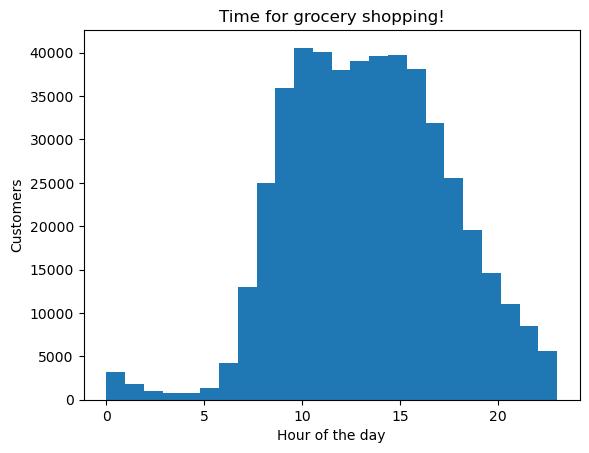

In [ ]:
orders['order_hour_of_day'].plot(kind='hist', bins=24,xlabel='Hour of the day',ylabel='Customers',title='Time for grocery shopping!')

The peak shopping hours are 10.00-16.00.

### [A3] What day of the week do people shop for groceries?

In [ ]:
orders['order_dow'].value_counts().sort_values(ascending=False)

0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64

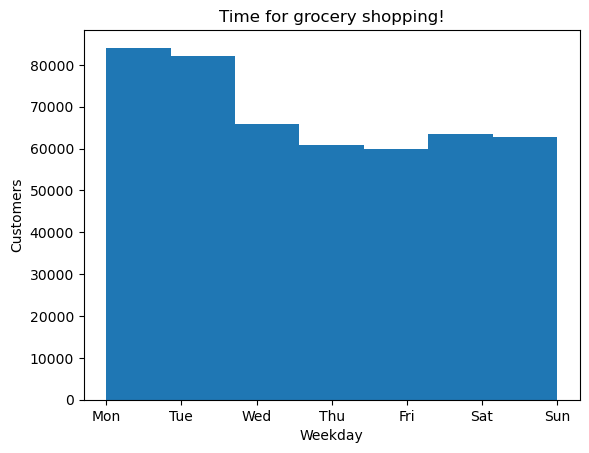

In [ ]:
tick = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
fig = orders["order_dow"].plot(
    kind="hist",
    bins=7,
    xlabel="Weekday",
    ylabel="Customers",
    title="Time for grocery shopping!",
)
fig.set_xticks(range(7))
fig.set_xticklabels([tick[i] for i in range(7)])
plt.show()

Mondays and Tuesdays are the most popular days of week for groceries shopping.

### [A4] How long do people wait until placing another order?

In [ ]:
gap = pd.DataFrame(orders["days_since_prior_order"].value_counts())
gap

,days_since_prior_order
30,51337
7,44577
6,33930
4,31006
3,30224
5,30096
first_order,28817
2,27138
8,25361
1,20179


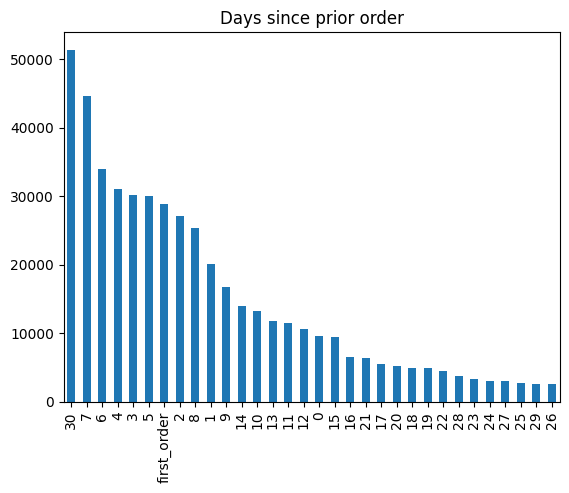

In [ ]:
gap.plot(kind='bar', legend=False, title='Days since prior order',xlabel='')
plt.show()

Most of the orders are placed in a month and within the first week from the previous order.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [ ]:
wed = orders[orders['order_dow']==2]
wed

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
19,294269,107523,29,2,10,1.0
32,2744097,5316,27,2,17,8.0
41,939348,21335,28,2,15,6.0
46,2398578,84825,2,2,17,4.0
51,1739741,118405,48,2,10,3.0
...,...,...,...,...,...,...
478951,35425,191742,18,2,17,8.0
478953,475910,29597,7,2,18,19.0
478957,239595,141340,28,2,14,9.0
478960,2666119,81154,11,2,15,5.0


In [ ]:
sat = orders[orders['order_dow']==5]
sat

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
8,2266494,34954,40,5,15,4.0
13,782916,36310,34,5,9,3.0
18,556588,6801,63,5,11,7.0
...,...,...,...,...,...,...
478920,2467432,116980,2,5,20,8.0
478929,658949,205899,86,5,14,4.0
478945,1387033,22496,1,5,14,NaN
478952,1553841,171649,6,5,15,8.0


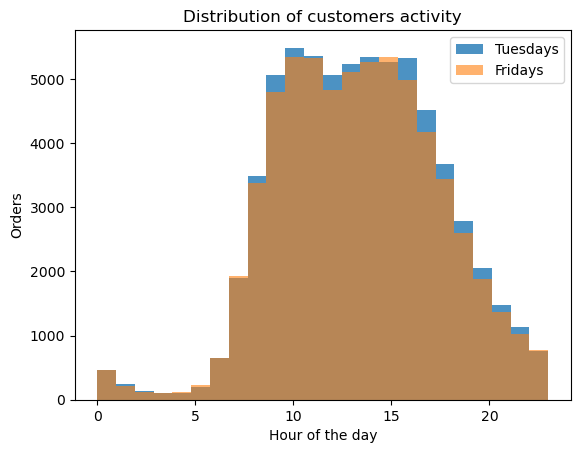

In [ ]:
wed["order_hour_of_day"].plot(bins=24, kind="hist", alpha=0.8, xlabel="Hour of the day", title='Distribution of customers activity', ylabel='Orders')
sat["order_hour_of_day"].plot(
    bins=24, kind="hist", alpha=0.6, xlabel="Hour of the day", ylabel="Orders"
)
plt.legend(["Tuesdays", "Fridays"])

plt.show()

The histogram shows that there is no significant difference between customers activity on Wednesdays and Saturdays.

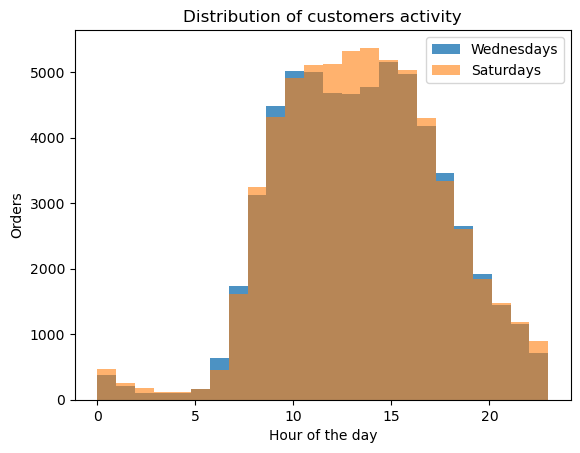

In [ ]:
d3 = orders[orders["order_dow"] == 3]
d6 = orders[orders["order_dow"] == 6]
d3["order_hour_of_day"].plot(
    bins=24,
    kind="hist",
    alpha=0.8,
    xlabel="Hour of the day",
    title="Distribution of customers activity",
    ylabel="Orders",
)
d6["order_hour_of_day"].plot(
    bins=24, kind="hist", alpha=0.6, xlabel="Hour of the day", ylabel="Orders"
)
plt.legend(["Wednesdays", "Saturdays"])

plt.show()

### [B2] What's the distribution for the number of orders per customer?

In [ ]:
number = orders.groupby('user_id')['order_number'].max()
number

user_id
2          4
4          6
5          4
6          4
7         19
          ..
206203     2
206206    66
206207    14
206208    34
206209    13
Name: order_number, Length: 157437, dtype: int64

In [ ]:
number.describe()

count    157437.000000
mean         15.577571
std          17.215517
min           1.000000
25%           4.000000
50%           9.000000
75%          20.000000
max         100.000000
Name: order_number, dtype: float64

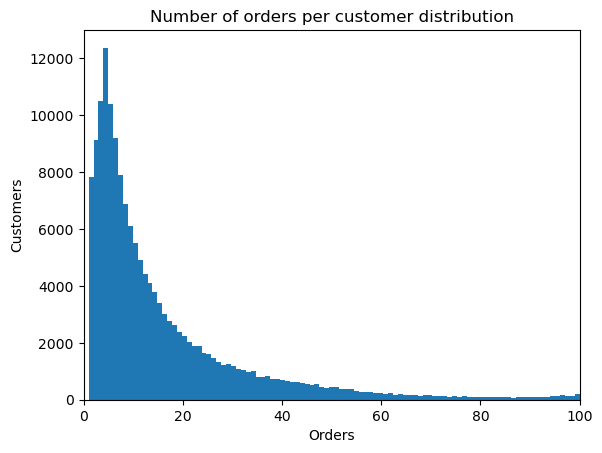

In [ ]:
number.plot(kind='hist',bins=100,xlim=[0,100],xlabel='Orders', ylabel='Customers', title='Number of orders per customer distribution')
plt.show()

Lots of customeres placed only 1 order, those who returned placed an order around 2-7 times.

### [B3] What are the top 20 popular products (display their id and name)?

In [118]:
# Top-20 product id's
top_20 = pd.DataFrame(order_p["product_id"].value_counts().head(20)).reset_index()
top_20

,product_id,count
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [132]:
mask = top_20['product_id']

In [133]:
# Top-20 products
products.query("product_id in @mask")[['product_id','product_name']]

,product_id,product_name
5875,5876,organic lemon
8276,8277,apple honeycrisp organic
13175,13176,bag of organic bananas
16796,16797,strawberries
21136,21137,organic strawberries
21902,21903,organic baby spinach
22934,22935,organic yellow onion
24851,24852,banana
24963,24964,organic garlic
26208,26209,limes


In [121]:
top_products = order_p.merge(products, on='product_id')
top_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17.0,0,chicken breast tenders breaded,129,1
1,567889,1560,1.0,1,bag of ice,37,1
2,2261212,26683,1.0,1,cafe latte pure lightly sweetened iced coffee ...,91,16
3,491251,8670,35.0,1,diced tomatoes,81,15
4,2571142,1940,5.0,1,organic 2% reduced fat milk,84,16
...,...,...,...,...,...,...,...
4545002,577211,15290,12.0,1,orange bell pepper,83,4
4545003,1219554,21914,9.0,0,peanut butter & jelly fruit & nut food bar,3,19
4545004,692640,47766,4.0,1,organic avocado,24,4
4545005,319435,691,8.0,1,organic promise strawberry fields cereal,121,14


In [124]:
top = pd.DataFrame(top_products[["product_name",'product_id']].value_counts().head(20)).reset_index()
top

,product_name,product_id,count
0,banana,24852,66050
1,bag of organic bananas,13176,53297
2,organic strawberries,21137,37039
3,organic baby spinach,21903,33971
4,organic hass avocado,47209,29773
5,organic avocado,47766,24689
6,large lemon,47626,21495
7,strawberries,16797,20018
8,limes,26209,19690
9,organic whole milk,27845,19600


In [127]:
top = top[['product_name', 'product_id']]
top

,product_name,product_id
0,banana,24852
1,bag of organic bananas,13176
2,organic strawberries,21137
3,organic baby spinach,21903
4,organic hass avocado,47209
5,organic avocado,47766
6,large lemon,47626
7,strawberries,16797
8,limes,26209
9,organic whole milk,27845


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [ ]:
# Checking the number of orders in the database
order_p['order_id'].nunique()

450046

In [129]:
# Displaying the number of products in each order, excluding our missing values
prod_num = pd.DataFrame(
    sorted(
        order_p.groupby("order_id")["add_to_cart_order"]
        .count()
    )
)
prod_num

,0
0,1
1,1
2,1
3,1
4,1
...,...
450041,64
450042,64
450043,64
450044,64


In [ ]:
prod_num.value_counts().head(15)

5     31923
6     31698
4     31054
7     30822
3     29046
8     28539
2     26292
9     25742
10    23248
1     21847
11    20406
12    18539
13    16497
14    14472
15    12696
dtype: int64

Looks like the most common number of items in the cart is in the range from 3 to 8.

In [ ]:
prod_num.describe(include="all")

,0
count,450046.000000
mean,10.097126
std,7.523747
min,1.000000
25%,5.000000
50%,8.000000
75%,14.000000
max,64.000000


The mean number of the items is also a useful measure.

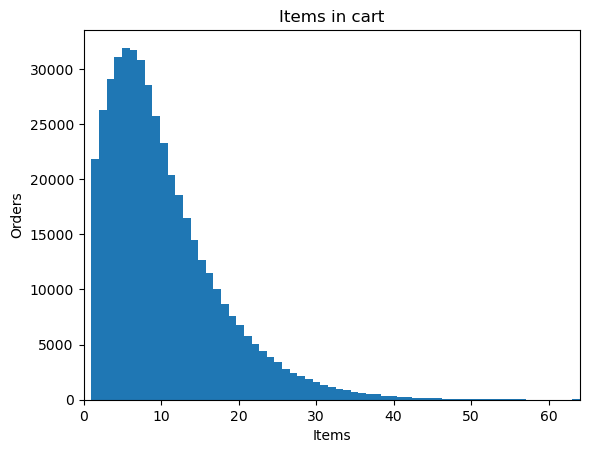

In [130]:
# Building a histogram with the distribution
prod_num.plot(kind='hist', bins=64, xlim=[0,64], title='Items in cart',ylabel='Orders',xlabel='Items',legend=False)
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [ ]:
order_p

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


In [ ]:
# Creating a dataframe with the most frequently reordered products
reordered = pd.DataFrame(order_p[order_p['reordered']==1].groupby('product_id')[['order_id','reordered']].sum().sort_values(by='reordered', ascending=False).head(20))
reordered.index.name = None
reordered

,order_id,reordered
24852,95207745254,55763
13176,75903122490,44450
21137,49021870650,28639
21903,44714320826,26233
47209,40520463583,23629
47766,32019814378,18743
27845,27804835173,16251
47626,25705979099,15044
27966,25115496376,14748
16797,23836287202,13945


In [ ]:
# Checking which column is product id
order_p[order_p["product_id"] == 24852].sum()

order_id             112844482127
product_id             1641474600
add_to_cart_order          325958
reordered                   55763
dtype: int64

In [ ]:
reordered_names = reordered.merge(products, left_index=True, right_on='product_id', how='left')
reordered_names

,order_id,reordered,product_id,product_name,aisle_id,department_id
24851,95207745254,55763,24852,banana,24,4
13175,75903122490,44450,13176,bag of organic bananas,24,4
21136,49021870650,28639,21137,organic strawberries,24,4
21902,44714320826,26233,21903,organic baby spinach,123,4
47208,40520463583,23629,47209,organic hass avocado,24,4
47765,32019814378,18743,47766,organic avocado,24,4
27844,27804835173,16251,27845,organic whole milk,84,16
47625,25705979099,15044,47626,large lemon,24,4
27965,25115496376,14748,27966,organic raspberries,123,4
16796,23836287202,13945,16797,strawberries,24,4


In [ ]:
reordered_names_fin = reordered_names[['product_id','product_name']].reset_index()
reordered_names_fin = reordered_names_fin.drop('index', axis='columns')
reordered_names_fin

,product_id,product_name
0,24852,banana
1,13176,bag of organic bananas
2,21137,organic strawberries
3,21903,organic baby spinach
4,47209,organic hass avocado
5,47766,organic avocado
6,27845,organic whole milk
7,47626,large lemon
8,27966,organic raspberries
9,16797,strawberries


### [C3] For each product, what proportion of its orders are reorders?

In [ ]:
id = reordered_names_fin['product_id']

In [ ]:
ordered = pd.DataFrame(order_p.query("product_id in @id").groupby('product_id')['reordered'].count())
ordered

,reordered
product_id,
5876,12232
8277,11993
13176,53297
16797,20018
21137,37039
21903,33971
22935,15898
24852,66050
24964,15292


In [ ]:
# Checking the number of entries to be 20
ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 5876 to 49683
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   reordered  20 non-null     int64
dtypes: int64(1)
memory usage: 320.0 bytes


In [ ]:
proportion = ordered.merge(reordered_names, left_index=True, right_on='product_id')
proportion

,reordered_x,order_id,reordered_y,product_id,product_name,aisle_id,department_id
5875,12232,14361668547,8412,5876,organic lemon,24,4
8276,11993,15126401073,8836,8277,apple honeycrisp organic,24,4
13175,53297,75903122490,44450,13176,bag of organic bananas,24,4
16796,20018,23836287202,13945,16797,strawberries,24,4
21136,37039,49021870650,28639,21137,organic strawberries,24,4
21902,33971,44714320826,26233,21903,organic baby spinach,123,4
22934,15898,19194485472,11145,22935,organic yellow onion,83,4
24851,66050,95207745254,55763,24852,banana,24,4
24963,15292,17757800533,10411,24964,organic garlic,83,4
26208,19690,22714806285,13327,26209,limes,24,4


In [ ]:
proportion['proportion'] = proportion['reordered_y'] / proportion['reordered_x']
proportion

,reordered_x,order_id,reordered_y,product_id,product_name,aisle_id,department_id,proportion
5875,12232,14361668547,8412,5876,organic lemon,24,4,0.687704
8276,11993,15126401073,8836,8277,apple honeycrisp organic,24,4,0.736763
13175,53297,75903122490,44450,13176,bag of organic bananas,24,4,0.834006
16796,20018,23836287202,13945,16797,strawberries,24,4,0.696623
21136,37039,49021870650,28639,21137,organic strawberries,24,4,0.773212
21902,33971,44714320826,26233,21903,organic baby spinach,123,4,0.772217
22934,15898,19194485472,11145,22935,organic yellow onion,83,4,0.701032
24851,66050,95207745254,55763,24852,banana,24,4,0.844254
24963,15292,17757800533,10411,24964,organic garlic,83,4,0.680813
26208,19690,22714806285,13327,26209,limes,24,4,0.676841


In [ ]:
proportion = proportion[['product_id', 'product_name', 'proportion']].sort_values(by='proportion', ascending=False)
proportion = proportion.reset_index().drop("index", axis="columns")
proportion

,product_id,product_name,proportion
0,24852,banana,0.844254
1,13176,bag of organic bananas,0.834006
2,27845,organic whole milk,0.829133
3,47209,organic hass avocado,0.793639
4,49235,organic half & half,0.780227
5,21137,organic strawberries,0.773212
6,21903,organic baby spinach,0.772217
7,27966,organic raspberries,0.768245
8,47766,organic avocado,0.759164
9,8277,apple honeycrisp organic,0.736763


In [ ]:
#ADDED BY REVIEWER

#Upload the dataframes. You can skip that step and use your own dataframes
df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')

#Merge sales and products
reorder_pct = df_order_products.merge(df_products)

#Get the reorder ratio
reorder_pct = reorder_pct.groupby(['product_id', 'product_name'])['reordered'].mean().to_frame()

#Format the output
reorder_pct.head(20).style.format({'reordered': '{:.1%}'}) #format to percentage with 1 decimal

,,reordered
product_id,product_name,
1,Chocolate Sandwich Cookies,56.4%
2,All-Seasons Salt,0.0%
3,Robust Golden Unsweetened Oolong Tea,73.8%
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,51.0%
7,Pure Coconut Water With Orange,50.0%
8,Cut Russet Potatoes Steam N' Mash,31.6%
9,Light Strawberry Blueberry Yogurt,76.2%
10,Sparkling Orange Juice & Prickly Pear Beverage,44.8%
11,Peach Mango Juice,62.5%


In [ ]:
#ADDED BY REVIEWER

reorder_pct = reorder_pct.reset_index()
reorder_pct[reorder_pct['product_id'] == 13176]

,product_id,product_name,reordered
11772,13176,Bag of Organic Bananas,0.834006


### [C4] For each customer, what proportion of their products ordered are reorders?

In [ ]:
cust_prop1 = pd.DataFrame(orders.merge(order_p, how='left', on='order_id'))
cust_prop1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30,19048.0,1.0,1.0
1,1515936,183418,11,6,13,30,47766.0,3.0,1.0
2,1515936,183418,11,6,13,30,45066.0,9.0,0.0
3,1515936,183418,11,6,13,30,24082.0,11.0,0.0
4,1515936,183418,11,6,13,30,24363.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
4573908,2071924,1730,18,1,14,15,1503.0,17.0,0.0
4573909,2071924,1730,18,1,14,15,4778.0,12.0,1.0
4573910,2071924,1730,18,1,14,15,11512.0,1.0,1.0
4573911,2071924,1730,18,1,14,15,4920.0,6.0,1.0


In [ ]:
cust_reorder = (
    pd.DataFrame(cust_prop1[cust_prop1["reordered"] == 1]
    .groupby("user_id")["reordered"]
    .sum()
))
cust_reorder

,reordered
user_id,
2,1.0
5,8.0
7,13.0
11,3.0
12,3.0
...,...
206203,6.0
206206,15.0
206207,41.0


In [ ]:
cust_order = pd.DataFrame(
    cust_prop1.groupby("user_id")["reordered"].count()
)
cust_order

,reordered
user_id,
2,26
4,2
5,12
6,4
7,14
...,...
206203,27
206206,21
206207,46


In [ ]:
cust_prop = cust_order.merge(cust_reorder, left_index=True, right_index=True)
cust_prop

,reordered_x,reordered_y
user_id,,
2,26,1.0
5,12,8.0
7,14,13.0
11,15,3.0
12,12,3.0
...,...,...
206203,27,6.0
206206,21,15.0
206207,46,41.0


In [ ]:
cust_prop["proportion"] = cust_prop["reordered_y"] / cust_prop["reordered_x"]
cust_prop.sort_values(by='proportion')

,reordered_x,reordered_y,proportion
user_id,,,
106148,67,1.0,0.014925
201663,66,1.0,0.015152
155522,58,1.0,0.017241
57630,57,1.0,0.017544
7349,55,1.0,0.018182
...,...,...,...
116344,3,3.0,1.000000
183769,3,3.0,1.000000
116337,1,1.0,1.000000


In [ ]:
cust_prop.describe()

,reordered_x,reordered_y,proportion
count,132991.000000,132991.000000,132991.000000
mean,33.144980,20.180599,0.556751
std,37.054519,28.702502,0.248833
min,1.000000,1.000000,0.014925
25%,10.000000,4.000000,0.363636
50%,21.000000,10.000000,0.562500
75%,42.000000,24.000000,0.750000
max,580.000000,477.000000,1.000000


In [ ]:
cust_prop['proportion'].value_counts()

1.000000    8102
0.500000    6524
0.333333    3896
0.666667    3864
0.250000    2536
            ... 
0.919643       1
0.776978       1
0.489655       1
0.309735       1
0.836634       1
Name: proportion, Length: 5219, dtype: int64

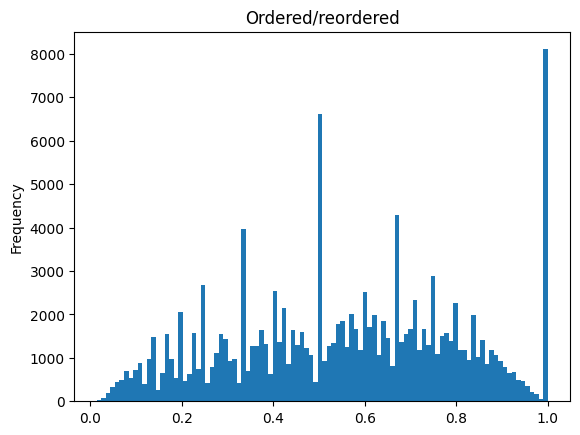

In [ ]:
cust_prop.plot(kind='hist',y='proportion', bins=100, ylabel='Customers', xlabel='Reordered', title='Ordered/reordered', legend=False)
plt.show()

Most of the customers reordered all of previously ordered items or reordered half of them.

### [C5] What are the top 20 items that people put in their carts first? 

In [ ]:
top = pd.DataFrame(order_p[order_p['add_to_cart_order']==1]['product_id'].value_counts().head(20))
top

,product_id
24852,15562
13176,11026
27845,4363
21137,3946
47209,3390
21903,3336
47766,3044
19660,2336
16797,2308
27966,2024


In [ ]:
top_20 = top.merge(products, left_index=True, right_on='product_id')
top_20

,product_id,product_id_x,product_id_y,product_name,aisle_id,department_id
24851,24852,15562,24852,banana,24,4
13175,13176,11026,13176,bag of organic bananas,24,4
27844,27845,4363,27845,organic whole milk,84,16
21136,21137,3946,21137,organic strawberries,24,4
47208,47209,3390,47209,organic hass avocado,24,4
21902,21903,3336,21903,organic baby spinach,123,4
47765,47766,3044,47766,organic avocado,24,4
19659,19660,2336,19660,spring water,115,7
16796,16797,2308,16797,strawberries,24,4
27965,27966,2024,27966,organic raspberries,123,4


In [ ]:
top_20 = (
    top_20[["product_id", "product_name", "product_id_x"]]
    .reset_index()
    .drop("index", axis="columns")
)
top_20

,product_id,product_name,product_id_x
0,24852,banana,15562
1,13176,bag of organic bananas,11026
2,27845,organic whole milk,4363
3,21137,organic strawberries,3946
4,47209,organic hass avocado,3390
5,21903,organic baby spinach,3336
6,47766,organic avocado,3044
7,19660,spring water,2336
8,16797,strawberries,2308
9,27966,organic raspberries,2024


### Conclusions <a id='da_conclusions'></a>
Data preprocessing revealed some issues in the data storage. It is recommended to pay attention at:
- while inputing new products it is better to check if there is already one stored, in order to avoid duplicates
- check what's happening in department 100 and aisle 21, as they store missing values
- add to the documentation which day of the week stands for 0
- investigate why on 2 am on day 3 a lot of duplicated values are being inputed

The key findings of the analysis are:
- people usually shop for groceries at 10.00-16.00, the most popular days are Sunday and Monday
- most of the orders are placed in a month and within the first week from the previous order
- there is no significant difference between hours of customers activity on the working days and weekends
- lots of customers did't return at all, while many of those who returned placed an order around 2-7 times
- the cart holds only 64 items
- people tend to reorder previously ordered products

It is recommended for the marketing team to work on the retention rate - attract new customers with discounts on their second orders, for instance. If a customer doesn't return in a week, send a reminder to restock their groceries supplies.
While most of the customers place less then 30 items in cart, some of them may want to order more, so it's better to enhance the capabilities of the application.
We revealed a list of the most popular products - these should be always in stock and suggested to all customers before placing an order.
Atttention should be payed to the quality of the products that were never reordered, ask customers for feedback.

[Back to Contents](#back)